## Classification Models-II

----------------------------------------------------------------
Author: Dr. Sampath Lonka 

Date: August 25, 2022

----------------------------------------------------------------

In this tutorial, we discuss the following topics:

- Feature Extraction 
   - Extracting the features from the text 
   - Extracting the features from the Images
   - Extracting the features from the Audio
- Classification of Text
  - Naive Bayes
  - Logistic Regression
  - kNN
  - SVM
- Evaluation of Classification Models
  - Confusion Matrix
  - Precision-Recall Tradeoff
  - The ROC curve

### 2.1 Feature Extraction 

In this section, we discuss different feature extraction techniques from text data and image data. These extracted features will be used in the modelling.  

### 2.1.1 Extracting the features from the text

To extact the features from the text, we use different *Natural Langauge Processing* (NLP) techniques namely, Bag of words, Count Vectorizer and TF-IDF vectorizer. We discuss these techniques briefly and show the implementation of them in `sklearn`. 

In [24]:
sample = ['problem of evil is another problem',
 'evil queen',
 'horizon problem']

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [26]:
# extract the vectors of sample text
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [27]:
#convert it to dataframe for manipulations
df = pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out())
df

,another,evil,horizon,is,of,problem,queen
0,1,1,0,1,1,2,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0


In [28]:
vec2 = TfidfVectorizer()
X = vec2.fit_transform(sample)
X

<3x7 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [29]:
df2 = pd.DataFrame(X.toarray(),columns=vec2.get_feature_names_out()) 
df2

,another,evil,horizon,is,of,problem,queen
0,0.411973,0.313316,0.000000,0.411973,0.411973,0.626632,0.000000
1,0.000000,0.605349,0.000000,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.000000,0.795961,0.000000,0.000000,0.605349,0.000000


### 2.2 Classification of text 

In this section, we discuss several classification methods for text data. 

For this task, we take the `Hotel_Review` dataset from Kaggle. Threre are different datasets on `Hotel_Review` in Kaggle. You can find the links here.
- [515k-hotel-reviews-data-in-europe](https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe?resource=download)
- [Hotel Review: Predict the happiness](https://www.kaggle.com/datasets/anu0012/hotel-review)


We use the second dataset for our task.

In [30]:
#load the data 
data_raw =pd.read_csv("D:\\ACADEMICS\\301_MACHINE LEARNING\\MDSC201-Machine-Learning\\Notes\\IPYNB\\train.csv")
data_raw.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [31]:
data_raw["Description"][0]

"The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing."

In [32]:
data_raw = data_raw[:8000]

In [33]:
data_raw.shape

(8000, 5)

In [34]:
data_raw["Browser_Used"].unique()

array(['Edge', 'Internet Explorer', 'Mozilla', 'InternetExplorer',
       'Firefox', 'Google Chrome', 'Chrome', 'IE', 'Opera',
       'Mozilla Firefox', 'Safari'], dtype=object)

In [35]:
data_raw = data_raw.drop("User_ID",axis=1)

In [36]:
data_raw["Browser_Used"].value_counts()

Edge                 1519
Firefox              1478
Google Chrome         969
InternetExplorer      962
Mozilla Firefox       869
Mozilla               624
Chrome                503
IE                    490
Internet Explorer     424
Opera                  82
Safari                 80
Name: Browser_Used, dtype: int64

In [37]:
data_raw["Device_Used"].value_counts()

Mobile     3120
Desktop    3118
Tablet     1762
Name: Device_Used, dtype: int64

In [38]:
data_raw["Is_Response"].value_counts()

happy        5406
not happy    2594
Name: Is_Response, dtype: int64

In [39]:
data_raw["Browser_Used"] = data_raw["Browser_Used"].replace({'Internet Explorer':'InternetExplorer','IE':'InternetExplorer',
                                                             'Mozilla':'Firefox','Mozilla Firefox':'Firefox','Google Chrome':'Chrome'}) 
data_raw['Browser_Used'].unique()  

array(['Edge', 'InternetExplorer', 'Firefox', 'Chrome', 'Opera', 'Safari'],
      dtype=object)

In [40]:
data_raw["Browser_Used"].value_counts()

Firefox             2971
InternetExplorer    1876
Edge                1519
Chrome              1472
Opera                 82
Safari                80
Name: Browser_Used, dtype: int64

### Pre-processing 

The machime learning algorithms trained based input numerical data. Thus, to train the model on the text, we need to convert the text to numeric. There are different techniques to archive it. The following algorithms used to convert the text into numeric. 
- Bag of Words 
- Tf-Idf 
- Glove Embedding
- BERT Embedding etc


In this tutorial, we discuss the *Bag of words* and *Tf-Idf*.

**Bag of Words** 

The model *Bag of Words* is the most common way of encoding a text document as a vector of numeric values. In this model, suppose there are total number of words in all documents is $M,$ each document is represented as a $M-$ dimensional vector. The vector for the $n$th document, $x_n=(x_{nm})_{m=1}^M;$ the number of times word $m$ appears in document $n.$



In [41]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
data_raw.columns

Index(['Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [43]:
full_pipeline = ColumnTransformer([
    ("label",OrdinalEncoder(),["Device_Used","Browser_Used","Is_Response"]),
    ])

df_prep = full_pipeline.fit_transform(data_raw)
df_prep = pd.DataFrame(df_prep, columns = ["Device_Used","Browser_Used","Is_Response"])
type(df_prep)

pandas.core.frame.DataFrame

In [44]:
df_prep.head()

,Device_Used,Browser_Used,Is_Response
0,1.0,1.0,1.0
1,1.0,3.0,1.0
2,2.0,2.0,1.0
3,0.0,3.0,0.0
4,2.0,1.0,1.0


In [45]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [46]:
nltk.download('stopwords')
 
corpus = []
 
for i in range(0, data_raw.shape[0]):
    text = re.sub('[^a-zA-Z]', '', data_raw['Description'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = ''.join(text)
    corpus.append(text)
 
# creating bag of words model
cv = CountVectorizer(max_features = 1500)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Msc2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [47]:
vec = CountVectorizer()
X = vec.fit_transform(data_raw["Description"])
X

<8000x22499 sparse matrix of type '<class 'numpy.int64'>'
	with 764731 stored elements in Compressed Sparse Row format>

In [48]:
df = pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out()) 

In [49]:
data = pd.concat([df,df_prep],axis=1)

In [50]:
data.shape

(8000, 22502)

In [51]:
X = data.drop(["Is_Response"],axis=1)
y = data["Is_Response"]

In [52]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,shuffle=True,random_state=5,test_size=0.2)

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [54]:
model = GaussianNB() 
model.fit(Xtrain,ytrain.ravel())  
y_pred = model.predict(Xtest) 

In [55]:
import matplotlib.pyplot as plt
import seaborn as sn

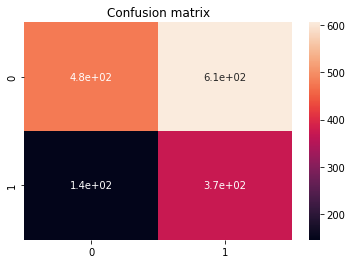

In [56]:
from sklearn.metrics import confusion_matrix
#acc = accuracy(Xtest, ytest) 
classes = [0, 1]  
cm = confusion_matrix(ytest,y_pred, labels=classes)
sn.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [57]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.44      0.56      1083
         1.0       0.38      0.72      0.50       517

    accuracy                           0.53      1600
   macro avg       0.57      0.58      0.53      1600
weighted avg       0.64      0.53      0.54      1600



In [58]:
from sklearn.linear_model import LogisticRegression

C:\Users\Msc2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


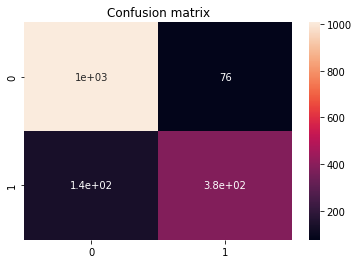

In [59]:
model = LogisticRegression()
model.fit(Xtrain, ytrain.ravel())
ypred = model.predict(Xtest) 
#confusion matrix
cm = confusion_matrix(ytest, ypred)
sn.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      1083
         1.0       0.83      0.74      0.78       517

    accuracy                           0.87      1600
   macro avg       0.86      0.83      0.84      1600
weighted avg       0.87      0.87      0.87      1600

